In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
pd.set_option("display.max_columns",None)

# PreProcessing
from imblearn.over_sampling import SMOTE

#ml libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.shape

(119390, 32)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

    Only below columns have some missing data, will be handling it later
    1. children
    2. market_segment
    3. agent
    4. company

### Exploratory Data Analysis

In [8]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

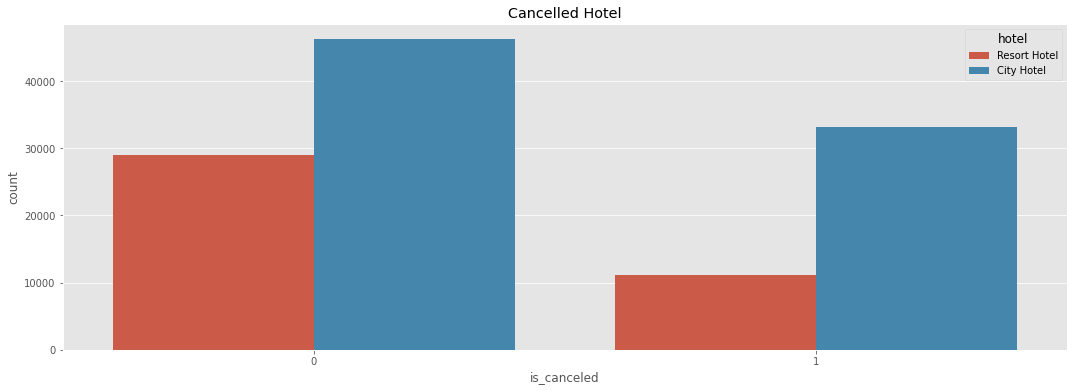

In [9]:
plt.figure(figsize=(18,6))
sns.countplot(x='is_canceled', hue = 'hotel', data= df)
plt.title('Cancelled Hotel')
plt.show()

    1. City Hotel has been canceled more as compared to Resort Hotels 
    2. Even City Hotel has highest booking

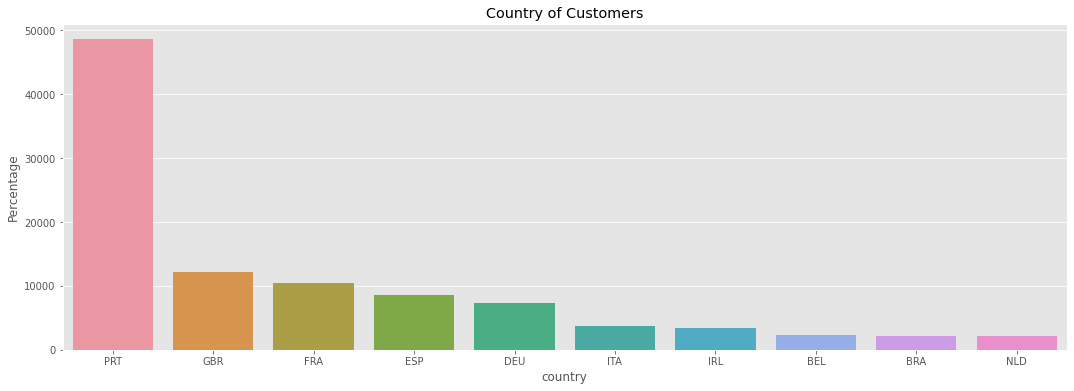

In [10]:
plt.figure(figsize=(18,6))
country_booking = df['country'].value_counts().rename_axis('country').reset_index(name='Percentage')
sns.barplot(x='country', y='Percentage', data=country_booking.head(10))
plt.title('Country of Customers')
plt.show()

    PRT has the most booking demand based on the data among the other countries

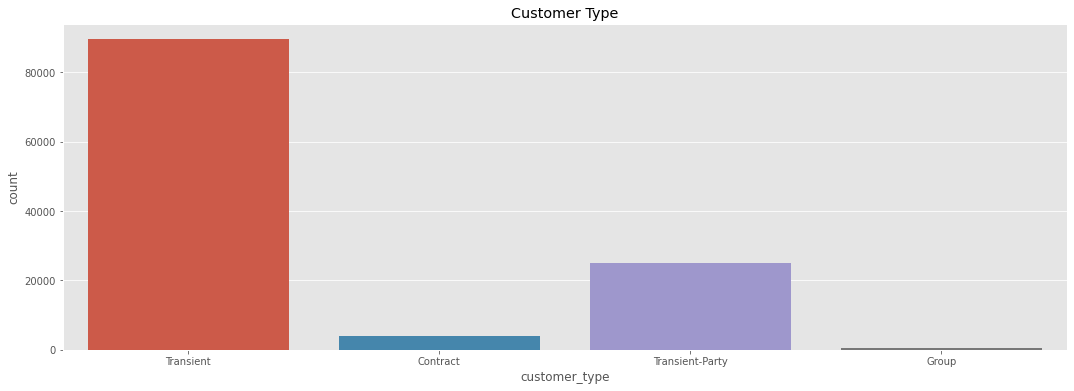

In [11]:
plt.figure(figsize=(18,6))
sns.countplot(x='customer_type', data= df)
plt.title('Customer Type')
plt.show()

    Type of booking has four categories:
    Transient travellers can include: has highest number
        1. Walk-in guests
        2. Guests with a last-minute booking, and/or
        3. Simply individual guests requiring a short stay at the hotel
        Ref: https://www.xotels.com/en/glossary/transient

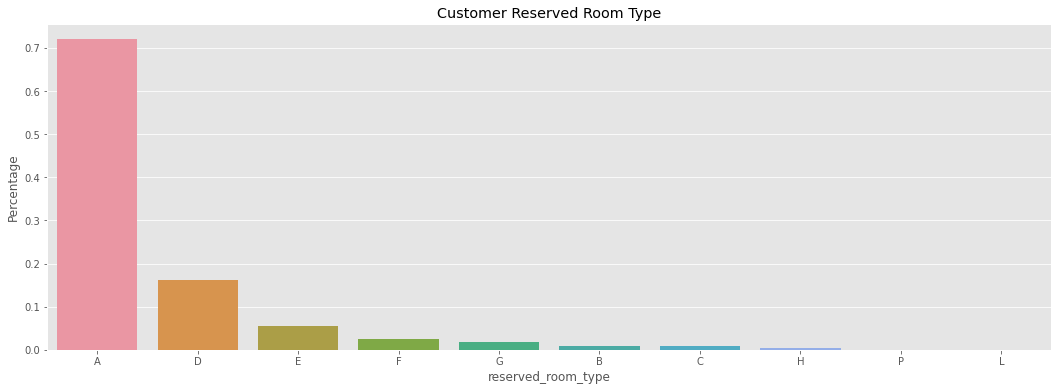

In [12]:
plt.figure(figsize=(18,6))
room_booking = df['reserved_room_type'].value_counts(normalize=True).rename_axis('reserved_room_type').reset_index(name='Percentage')
sns.barplot(x='reserved_room_type', y='Percentage', data= room_booking)
plt.title('Customer Reserved Room Type')
plt.show()

    1. Type of Reserved Room is A, D, E, G, C, F, H, L, P.
    2. Most of customers book the type A room more than 70%.

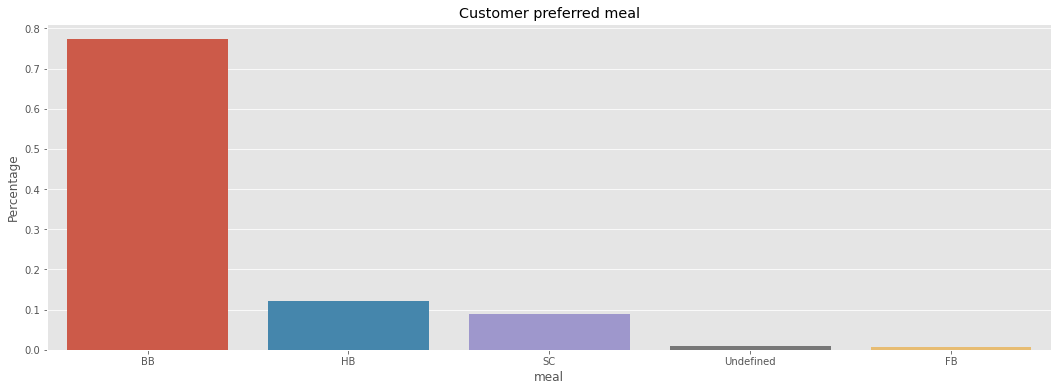

In [13]:
plt.figure(figsize=(18,6))
room_booking = df['meal'].value_counts(normalize=True).rename_axis('meal').reset_index(name='Percentage')
sns.barplot(x='meal', y='Percentage', data= room_booking)
plt.title('Customer preferred meal')
plt.show()

    Type of meal booked. Categories are presented in standard hospitality meal packages:

    1. BB means Bed & Breakfast as much as 77.31%
    2. HB means Half board (breakfast and one other meal – usually dinner) as much as 12.11%
    3. FB means Full board (breakfast, lunch and dinner) as much as 0.66%
    4. Undefined/SC means no meal as much as 9.89%

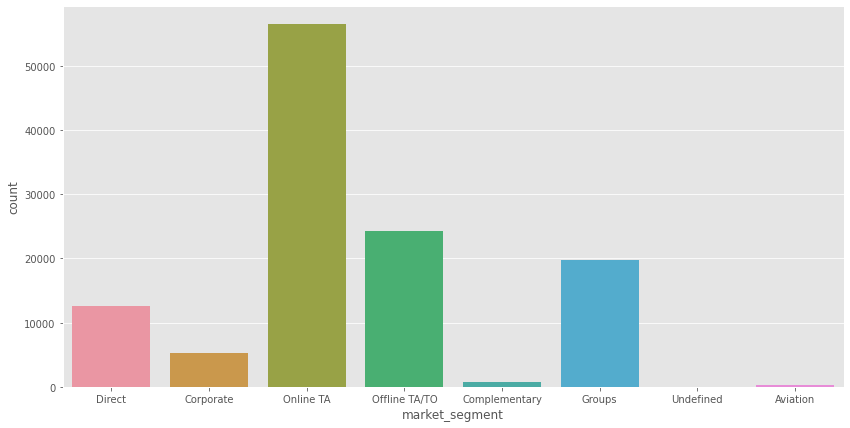

In [14]:
plt.figure(figsize=(14,7))
sns.countplot(df['market_segment']);

    The highest book is using Online TA.

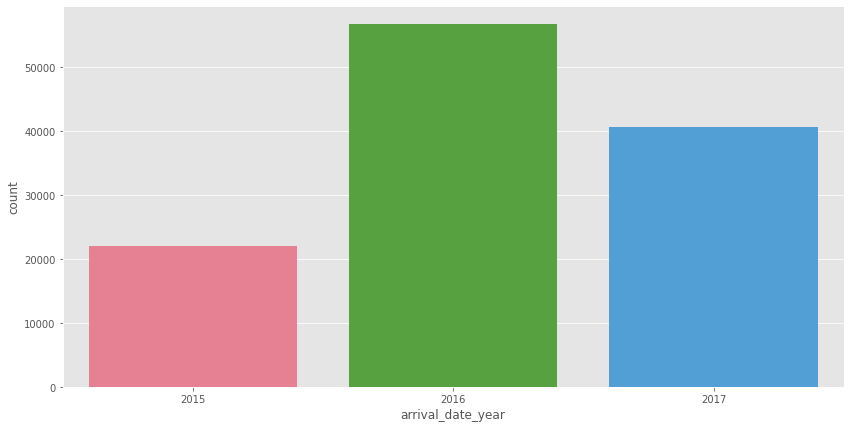

In [15]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_year'], palette='husl')
plt.show()

    The highest arrival was in 2016

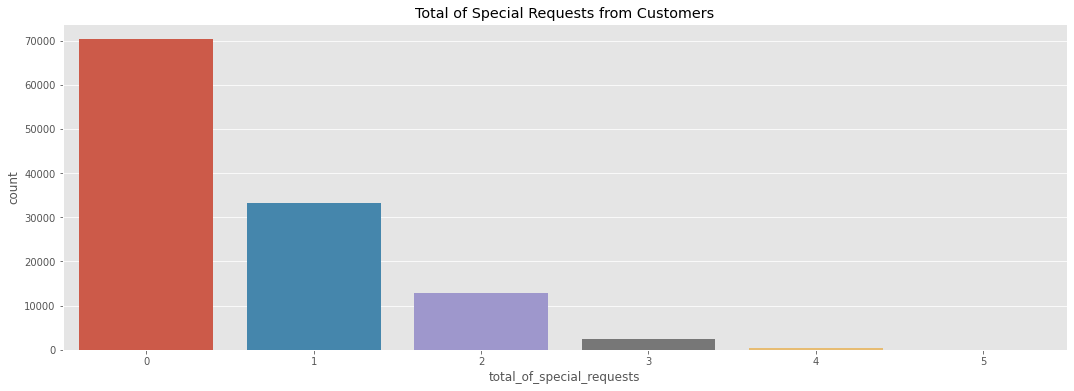

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(x='total_of_special_requests', data= df)
plt.title('Total of Special Requests from Customers')
plt.show()

    Most customers don't make any special requests. They don't ask for any additional requests because they only transient customers.

1    87.505654
0    12.494346
Name: alloted_given_rooms, dtype: float64

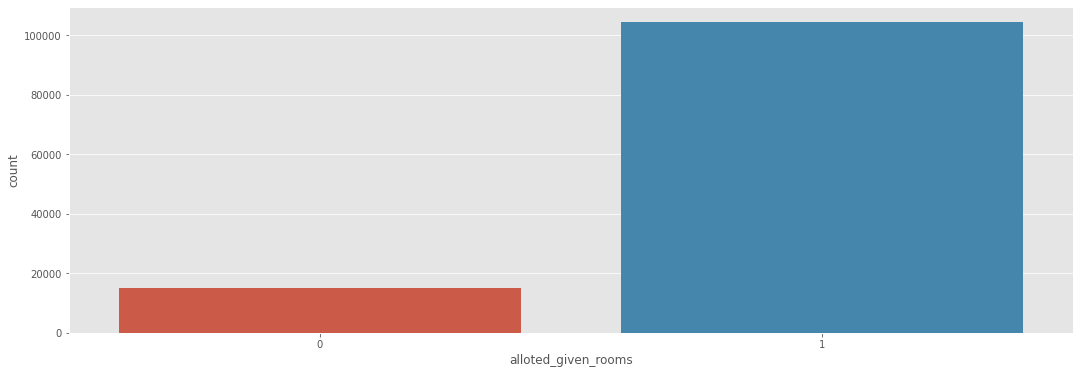

In [17]:
df['alloted_given_rooms'] = df.apply(lambda x : '1' if x.reserved_room_type ==x.assigned_room_type else '0',axis=1)

df[['reserved_room_type','assigned_room_type','alloted_given_rooms']].head()
plt.figure(figsize=(18,6))
sns.countplot(x ='alloted_given_rooms', data = df);
(df.alloted_given_rooms.value_counts() / len(df))*100

    around 12% of guests didnt got their reserved room types

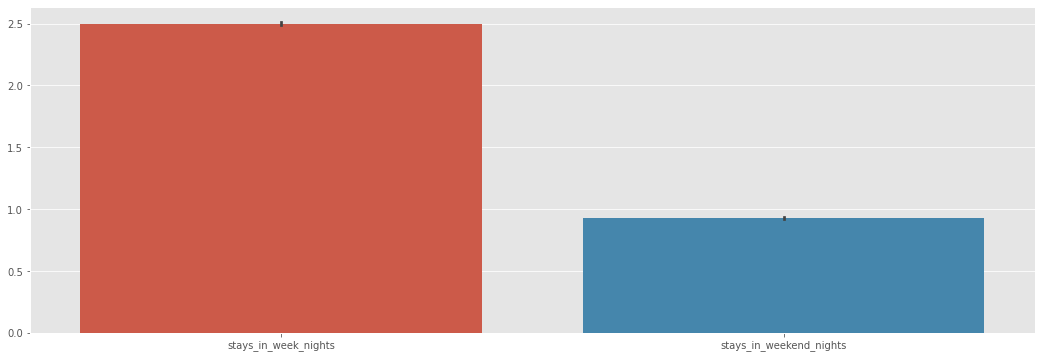

In [18]:
plt.figure(figsize=(18,6))
sns.barplot(data=df[['stays_in_week_nights','stays_in_weekend_nights']])
total_stays_weeknights =(df.stays_in_week_nights.sum() / len(df))*100
total_stays_weekendnights =(df.stays_in_weekend_nights.sum() / len(df))*100

    More Guests stays in hotel in week days than weekends. 
    maybe the guest staying in hotels are for work purpose

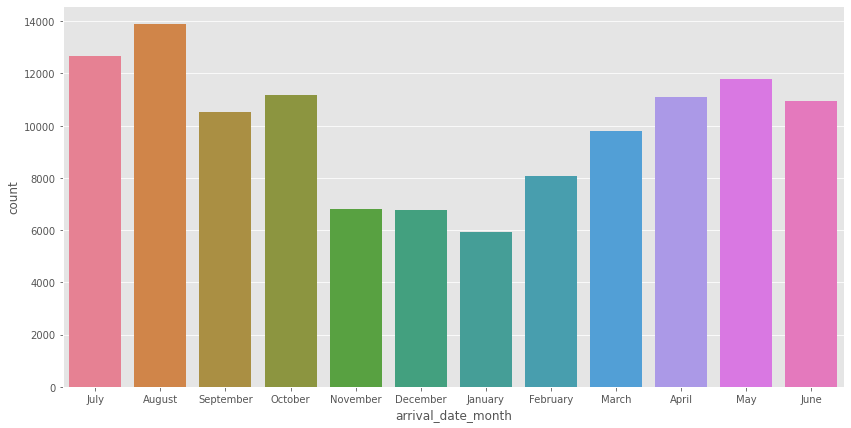

In [19]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_month'], palette='husl')
plt.show()

    August has most number of guest

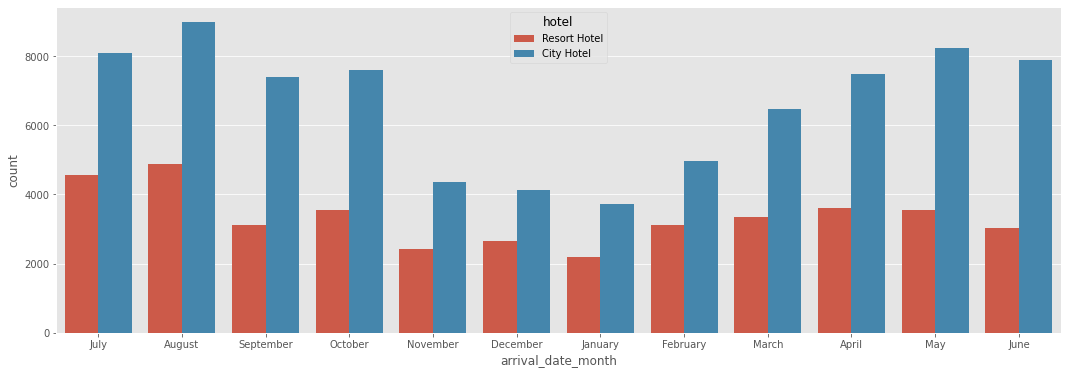

In [20]:
plt.figure(figsize=(18,6))
sns.countplot(x='arrival_date_month',hue = 'hotel', data= df);

    We can cleary notice, city hotel has more number of guest as compared to resort hotel, this may be the reason of business purpose or work related

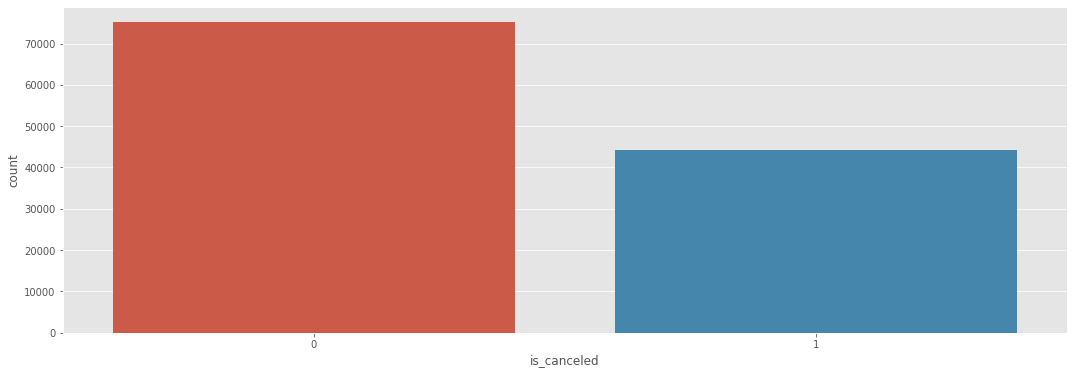

In [21]:
plt.figure(figsize=(18,6))
sns.countplot(x='is_canceled',data= df);

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,alloted_given_rooms
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,1


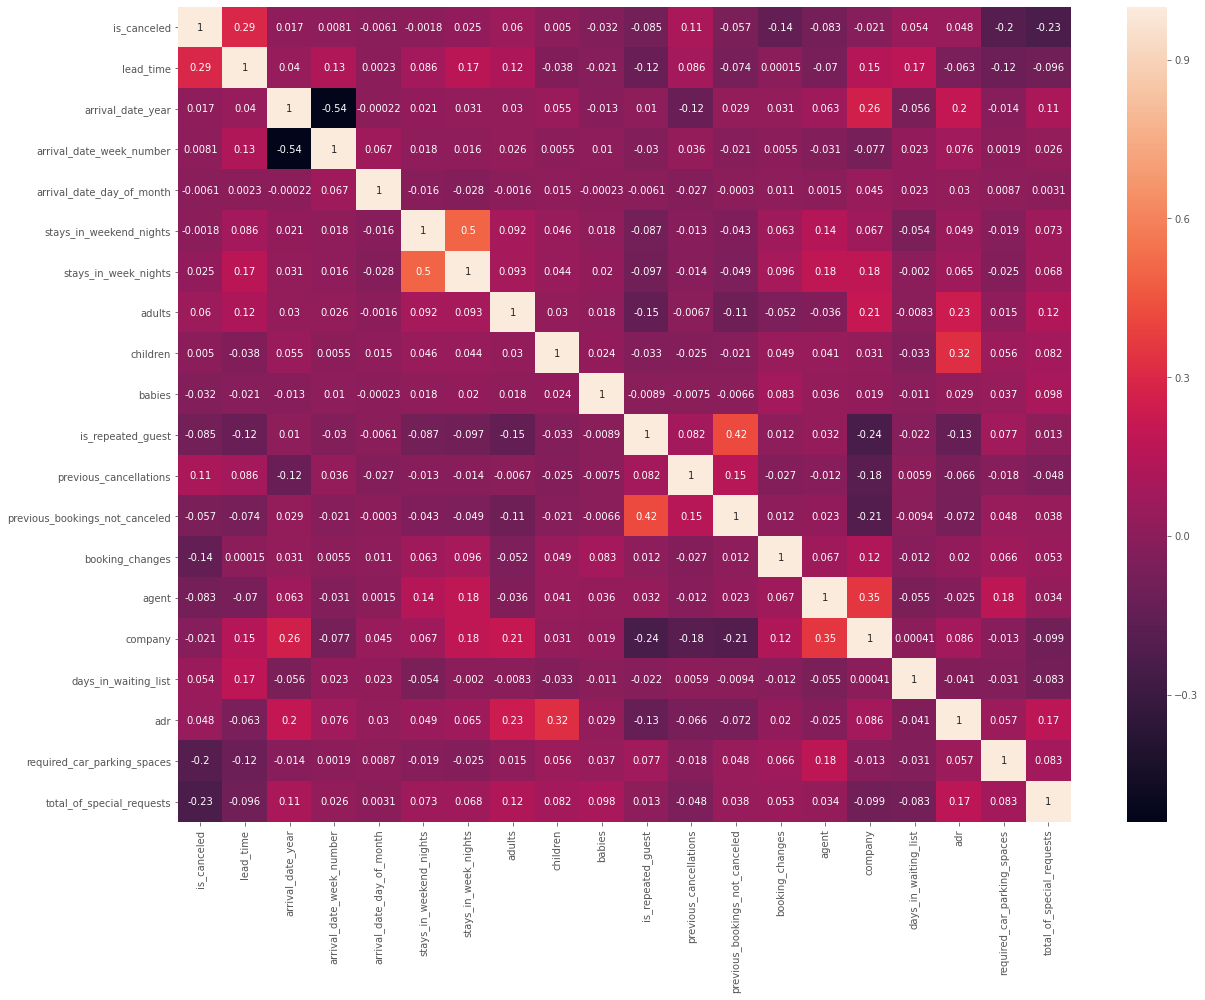

In [23]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True);

    stays in weeknights & weekends has a good corelations

In [24]:
df.shape

(119390, 33)

### Data Cleaning and Preparation

In [25]:
# filling null values with zero
df.fillna(0, inplace = True)

In [26]:
# dropping columns that are not useful

columns_discard = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list','alloted_given_rooms']

df.drop(columns_discard, axis = 1, inplace = True)

In [27]:
df.shape

(119390, 26)

In [28]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
df = df[~((df.children == 0) & (df.adults == 0) & (df.babies == 0))]

In [29]:
df.shape

(119210, 26)

In [30]:
# creating numerical and categorical dataframes
category_cols = [col for col in df.columns if df[col].dtype == 'O']
category_cols

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [31]:
category_df = df[category_cols]
category_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [32]:
#extracting date components
category_df['reservation_status_date'] = pd.to_datetime(category_df['reservation_status_date'])
category_df['year'] = category_df['reservation_status_date'].dt.year
category_df['month'] = category_df['reservation_status_date'].dt.month
category_df['day'] = category_df['reservation_status_date'].dt.day

/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set o

In [33]:
category_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
category_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [35]:
# encoding categorical variables

category_df['hotel'] = category_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
category_df['meal'] = category_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
category_df['market_segment'] = category_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

category_df['distribution_channel'] = category_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

category_df['reserved_room_type'] = category_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

category_df['deposit_type'] = category_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

category_df['customer_type'] = category_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

category_df['year'] = category_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWa

In [36]:
category_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [37]:
numeric_df = df.drop(columns = category_cols, axis = 1)
numeric_df.drop('is_canceled', axis = 1, inplace = True)
numeric_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,104.40,0,0


In [38]:
# normalizing numerical variables

numeric_df['lead_time'] = np.log(numeric_df['lead_time'] + 1)
numeric_df['arrival_date_week_number'] = np.log(numeric_df['arrival_date_week_number'] + 1)
numeric_df['arrival_date_day_of_month'] = np.log(numeric_df['arrival_date_day_of_month'] + 1)
numeric_df['agent'] = np.log(numeric_df['agent'] + 1)
numeric_df['company'] = np.log(numeric_df['company'] + 1)
numeric_df['adr'] = np.log(numeric_df['adr'] + 1)

/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
numeric_df['adr'] = numeric_df['adr'].fillna(value = numeric_df['adr'].mean())

### Target: is_canceled

    0 = Not Canceled
    1 = Canceled

      - TN: Guest's predict with Not Canceled and the actual is Not Canceled
      - TP: Guest's predict with Canceled and the actual is Canceled
      - FP: Guest's predict with Canceled and the actual is Not Canceled
      - FN: Guest's predict with Not Canceled and the actual is Canceled
    Actions:

    FP: When the customer arrives, the room is not available. Customers won't book at the hotel again because they are considered to provide poor service, the hotel experiences financial losses, and a good name.
    FN: The hotel has the advantage of empty rooms because it's canceled. Customers have more previlledge to choose facilities if they want.
    I want to reduce one of the situations and its FP. The score that will be pressed is the precision score.

In [40]:
X = pd.concat([category_df, numeric_df], axis = 1)
y = df['is_canceled']

In [41]:
len(df)

119210

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = 0)

In [43]:
X_train.shape

(83447, 26)

In [44]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests
21551,0,0,0,0,1,0,0,2,3,4,0.000000,2.397895,1.098612,0,2,2,0.0,0,0,0,0,0.000000,0.000000,3.850148,1,0
24890,0,0,2,2,3,0,0,3,6,14,5.484797,3.178054,1.609438,4,6,2,0.0,0,1,0,0,5.170484,0.000000,4.485034,0,0
78072,1,2,3,2,1,0,2,0,10,2,5.669881,3.761200,2.890372,0,1,2,0.0,0,0,1,0,1.609438,0.000000,4.574711,0,0
12504,0,0,2,2,2,0,0,3,2,10,4.969813,3.332205,1.098612,2,3,2,0.0,0,0,0,0,5.484797,0.000000,4.912655,0,1
31059,0,0,1,1,1,0,0,2,12,22,0.000000,3.970292,3.091042,0,1,1,0.0,0,1,0,1,0.000000,6.204558,3.688879,1,1


In [45]:
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train,
                                 y_train.ravel())
X_train = pd.DataFrame(X_train, columns=X_train.columns)
y_train = pd.Series(y_train, name=y.name)

In [46]:
# rm = RandomUnderSampler(random_state=0)
# x_train, y_train = rm.fit_sample(x_train,
#                                  y_train.ravel())
# x_train = pd.DataFrame(x_train, columns=x_train.columns)
# y_train = pd.Series(y_train, name=y.name)

In [47]:
# y_train.value_counts()

In [48]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7734250482342085
Confusion Matrix : 
[[18311  4192]
 [ 3911  9349]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     22503
           1       0.69      0.71      0.70     13260

    accuracy                           0.77     35763
   macro avg       0.76      0.76      0.76     35763
weighted avg       0.77      0.77      0.77     35763



/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.890557279870257
Confusion Matrix : 
[[20801  1702]
 [ 2212 11048]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     22503
           1       0.87      0.83      0.85     13260

    accuracy                           0.89     35763
   macro avg       0.89      0.88      0.88     35763
weighted avg       0.89      0.89      0.89     35763



In [50]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9452227162150826
Confusion Matrix : 
[[21426  1077]
 [  882 12378]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22503
           1       0.92      0.93      0.93     13260

    accuracy                           0.95     35763
   macro avg       0.94      0.94      0.94     35763
weighted avg       0.95      0.95      0.95     35763



In [51]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9573302016050108
Confusion Matrix : 
[[22194   309]
 [ 1217 12043]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22503
           1       0.97      0.91      0.94     13260

    accuracy                           0.96     35763
   macro avg       0.96      0.95      0.95     35763
weighted avg       0.96      0.96      0.96     35763



### Target: total_of_special_requests

In [52]:
df_new = pd.concat([category_df, numeric_df, df['is_canceled']], axis = 1)

In [53]:
df_new.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,0,0,0,0,0,0,0,0,7,1,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0,0
1,0,0,0,0,0,0,0,0,7,1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0,0
2,0,0,0,0,1,0,0,0,7,2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0,0
3,0,0,1,1,1,0,0,0,7,2,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0,0
4,0,0,2,2,1,0,0,0,7,3,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,1,0


In [54]:
# df_new.drop('is_canceled', axis=1, inplace=True)

In [55]:
X = df_new.drop('total_of_special_requests', axis=1)
y = df_new['total_of_special_requests']

In [56]:
X.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,is_canceled
0,0,0,0,0,0,0,0,0,7,1,5.837730,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
1,0,0,0,0,0,0,0,0,7,1,6.603944,3.332205,0.693147,0,0,2,0.0,0,0,0,0,0.000000,0.0,0.000000,0,0
2,0,0,0,0,1,0,0,0,7,2,2.079442,3.332205,0.693147,0,1,1,0.0,0,0,0,0,0.000000,0.0,4.330733,0,0
3,0,0,1,1,1,0,0,0,7,2,2.639057,3.332205,0.693147,0,1,1,0.0,0,0,0,0,5.720312,0.0,4.330733,0,0
4,0,0,2,2,1,0,0,0,7,3,2.708050,3.332205,0.693147,0,2,2,0.0,0,0,0,0,5.484797,0.0,4.595120,0,0


In [57]:
X.shape

(119210, 26)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = 0)

In [59]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score of Logistic Regression is : 0.6376142941028438
Confusion Matrix : 
[[18629  2350    80     1     0     0]
 [ 5760  4146    49     0     0     0]
 [ 1872  1986    28     0     0     0]
 [  348   397     3     0     0     0]
 [   40    59     3     0     0     0]
 [    6     5     1     0     0     0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.88      0.78     21060
           1       0.46      0.42      0.44      9955
           2       0.17      0.01      0.01      3886
           3       0.00      0.00      0.00       748
           4       0.00      0.00      0.00       102
           5       0.00      0.00      0.00        12

    accuracy                           0.64     35763
   macro avg       0.22      0.22      0.21     35763
weighted avg       0.56      0.64      0.58     35763



In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.6611581802421497
Confusion Matrix : 
[[17640  2992   385    41     2     0]
 [ 3969  5323   623    35     5     0]
 [ 1464  1735   650    33     4     0]
 [  286   335    95    29     3     0]
 [   38    41    15     5     3     0]
 [    8     3     0     0     1     0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.84      0.79     21060
           1       0.51      0.53      0.52      9955
           2       0.37      0.17      0.23      3886
           3       0.20      0.04      0.07       748
           4       0.17      0.03      0.05       102
           5       0.00      0.00      0.00        12

    accuracy                           0.66     35763
   macro avg       0.33      0.27      0.28     35763
weighted avg       0.63      0.66      0.64     35763



/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.6863518161228085
Confusion Matrix : 
[[17335  2701   816   183    21     4]
 [ 2738  5575  1330   292    19     1]
 [  860  1364  1448   188    21     5]
 [  158   233   177   166    12     2]
 [   13    28    22    18    20     1]
 [    0     3     2     2     3     2]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     21060
           1       0.56      0.56      0.56      9955
           2       0.38      0.37      0.38      3886
           3       0.20      0.22      0.21       748
           4       0.21      0.20      0.20       102
           5       0.13      0.17      0.15        12

    accuracy                           0.69     35763
   macro avg       0.38      0.39      0.39     35763
weighted avg       0.69      0.69      0.69     35763



In [62]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.7489024969941
Confusion Matrix : 
[[18919  1879   253     8     0     1]
 [ 2856  6414   649    34     2     0]
 [  902  1633  1301    48     1     1]
 [  184   284   143   130     6     1]
 [   16    35    26     6    17     2]
 [    2     2     3     0     3     2]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86     21060
           1       0.63      0.64      0.63      9955
           2       0.55      0.33      0.42      3886
           3       0.58      0.17      0.27       748
           4       0.59      0.17      0.26       102
           5       0.29      0.17      0.21        12

    accuracy                           0.75     35763
   macro avg       0.57      0.40      0.44     35763
weighted avg       0.73      0.75      0.74     35763



### Target: hotel

In [63]:
df_new = pd.concat([category_df, numeric_df, df['is_canceled']], axis = 1)
df_new = df_new.loc[df_new['is_canceled'] == 0]

In [64]:
df_new.drop('is_canceled', axis=1, inplace=True)

In [65]:
X = df_new.drop('hotel', axis=1)
y = df_new['hotel']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = 0)

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8278972627088518
Confusion Matrix : 
[[ 6503  2175]
 [ 1698 12128]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      8678
           1       0.85      0.88      0.86     13826

    accuracy                           0.83     22504
   macro avg       0.82      0.81      0.82     22504
weighted avg       0.83      0.83      0.83     22504



/home/winjit/anaconda3/envs/ps_pscore_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9283682900817632
Confusion Matrix : 
[[ 7824   854]
 [  758 13068]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      8678
           1       0.94      0.95      0.94     13826

    accuracy                           0.93     22504
   macro avg       0.93      0.92      0.92     22504
weighted avg       0.93      0.93      0.93     22504



In [69]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9759598293636687
Confusion Matrix : 
[[ 8390   288]
 [  253 13573]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8678
           1       0.98      0.98      0.98     13826

    accuracy                           0.98     22504
   macro avg       0.97      0.97      0.97     22504
weighted avg       0.98      0.98      0.98     22504



In [70]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9855581230003555
Confusion Matrix : 
[[ 8521   157]
 [  168 13658]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8678
           1       0.99      0.99      0.99     13826

    accuracy                           0.99     22504
   macro avg       0.98      0.98      0.98     22504
weighted avg       0.99      0.99      0.99     22504



## END